## EDS 220: Eaton and Palisades False Color Imagery

In [88]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr   
import netCDF4

### Task 2

### 2. Fire perimeter data exploration

Exploration summary:  
The fire perimeter data I found is a layer containing fire perimeters/boundaries for Eaton and Palisades fires. Its is projected and has the EPSG:3857 CRS. And it represents the fire perimeters with polygons. 

In [89]:
# Read in Palisades and Eaton fire perimeter data 
fp_eaton = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp_eaton)

fp_pal = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp_pal)

In [90]:
# Check the projection and coordinate reference system of data 
eaton.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [91]:
# Check the projection and coordinate reference system of data 
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [92]:
# Check the first 5 rows of data 
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [93]:
# Check the first 5 rows of data 
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [94]:
# Check data column types 
eaton.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

In [95]:
# Check data column types 
palisades.dtypes

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

### 3. NetCDF data import and exploration

Exploration summary:  
This landsat data is stored in a NetCDF data format with each layer being a matrix. Upon exploring this data I found that it is 3 dimensional. it contains one layer representing time, and another two representing x and y coordinates on a map. Y coordinates decrease as you go down (south) and X coordinates increase as you go right (east). Its CRS is EPSG:32611, its units are meters, and its resolution is 30 meters and it is projected. It contains this information for red, green, blue, nir08, and swir22 bands. 


In [96]:
# Read in collection of bands data 
landsat = xr.open_dataset(os.path.join("data","landsat8-2025-02-23-palisades-eaton.nc"))
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

### 4. Restoring geospatial information

In [97]:
# a. Print crs of band data
print('CRS:' , landsat.rio.crs)

CRS: None


The landsat data is not a geospatial object because it does not have a coordinate reference system.

In [98]:
# b. Print crs by accessing attribute of dataset
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [99]:
# c. Recover crs of band data 
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)
# d. Print recovered crs
print('CRS:' , landsat.rio.crs)

CRS: EPSG:32611


### 5. True color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'Y coordinate')

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


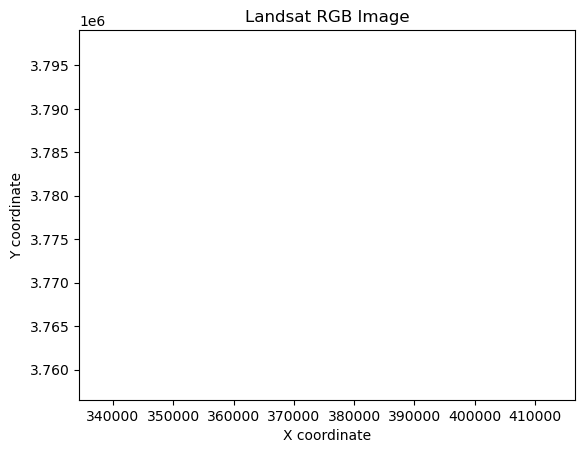

In [100]:
# a. Extract RGB variables and plot
figure = landsat[["red","green","blue"]].to_array().plot.imshow()

# Add axis labels and title
ax = figure.axes
ax.set_title("Landsat RGB Image")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")


Text(0, 0.5, 'Y coordinate')

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


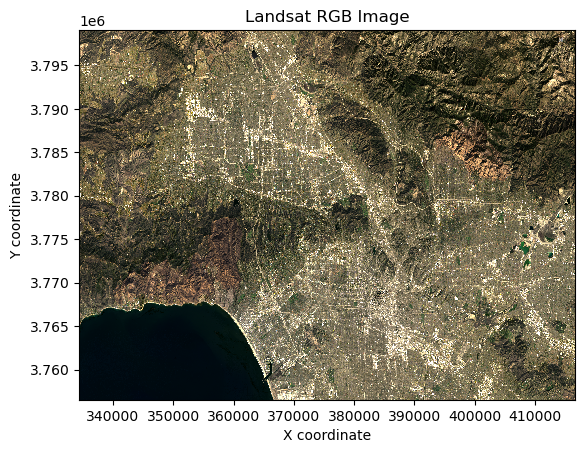

In [101]:
# b. Adjust band scale 
figure = landsat[["red","green","blue"]].to_array().plot.imshow(robust=True)

# Add axis labels and title
ax = figure.axes
ax.set_title("Landsat RGB Image")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")

In [102]:
# c. Check number of NAs in each band
for band in ["red","green","blue"]:
    print(band, np.isnan(landsat[band]).sum().item())


red 0
green 1
blue 109


In [103]:
# d. Substitute nan with zero 
landsat = landsat.fillna(0)

# Ensure nas are converted into zero
for band in ["red","green","blue"]:
    print(band, np.isnan(landsat[band]).sum().item())


red 0
green 0
blue 0


Text(0, 0.5, 'Y coordinate')

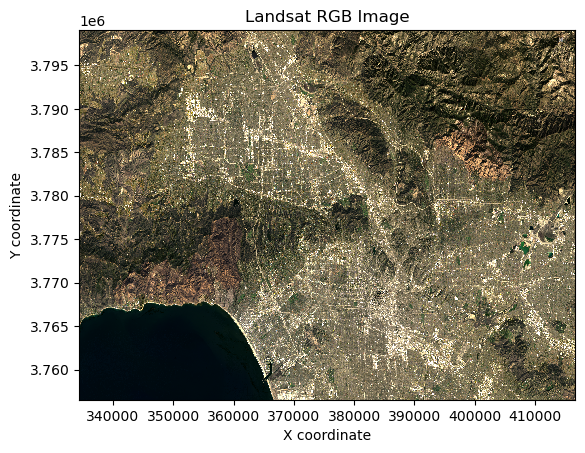

In [104]:
# e. Create rgb image without warnings
# Plot RGB with robust scaling
figure = landsat[["red","green","blue"]].to_array().plot.imshow(robust=True)

# Add axis labels and title
ax = figure.axes
ax.set_title("Landsat RGB Image")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")


#### f. 
Part a was a blank white map, it looked like this because clouds were outliers and they distorted the scale. It made it impossible to see the rest of the rgb colors on the map. It also plotted nans which caused an error. The map in part e on the other hand used robust = true to remove the top and bottom percentiles from the plot in order to ensure RGB values got plotted. Also, it turned nans into zeros in order to eliminate the error. 

### 4. False color image